In [1]:
import scanpy as sc
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3

DATA_PATH = 'transcriptomic_preproc'
MARKERS_CSF_MS_PATH = 'results\markers_CSF_MS.json'
MARKERS_PBMC_MS_PATH = 'results\markers_PBMC_MS.json'
MARKERS_CSF_HC_PATH = 'results\markers_CSF_HC.json'
MARKERS_PBMC_HC_PATH = 'results\markers_PBMC_HC.json'
RANDOM_STATE = 42

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
markers_csf_ms = json.load(open(MARKERS_CSF_MS_PATH))
markers_pbmc_ms = json.load(open(MARKERS_PBMC_MS_PATH))
markers_csf_hc = json.load(open(MARKERS_CSF_HC_PATH))
markers_pbmc_hc = json.load(open(MARKERS_PBMC_HC_PATH))

In [3]:
markers_csf_ms.keys(), markers_csf_hc.keys()

(dict_keys(['B cells', 'DC', 'HSC/MPP', 'ILC', 'Monocytes', 'Plasma cells', 'T cells']),
 dict_keys(['B cells', 'DC', 'HSC/MPP', 'ILC', 'Monocytes', 'Plasma cells', 'T cells']))

In [4]:
markers_pbmc_ms.keys(), markers_pbmc_hc.keys()

(dict_keys(['B cells', 'Cycling cells', 'DC', 'Double-positive thymocytes', 'ETP', 'HSC/MPP', 'ILC', 'Macrophages', 'Mast cells', 'Megakaryocyte precursor', 'Megakaryocytes/platelets', 'Monocytes', 'Plasma cells', 'T cells', 'pDC']),
 dict_keys(['B cells', 'DC', 'HSC/MPP', 'ILC', 'Megakaryocyte precursor', 'Monocytes', 'Plasma cells', 'T cells']))

In [5]:
cell_types = list(markers_csf_ms.keys()) + list(markers_pbmc_ms.keys()) + list(markers_csf_hc.keys()) + list(markers_pbmc_hc.keys())
cell_types = np.unique(cell_types)
cell_types = cell_types.tolist()

### CSF

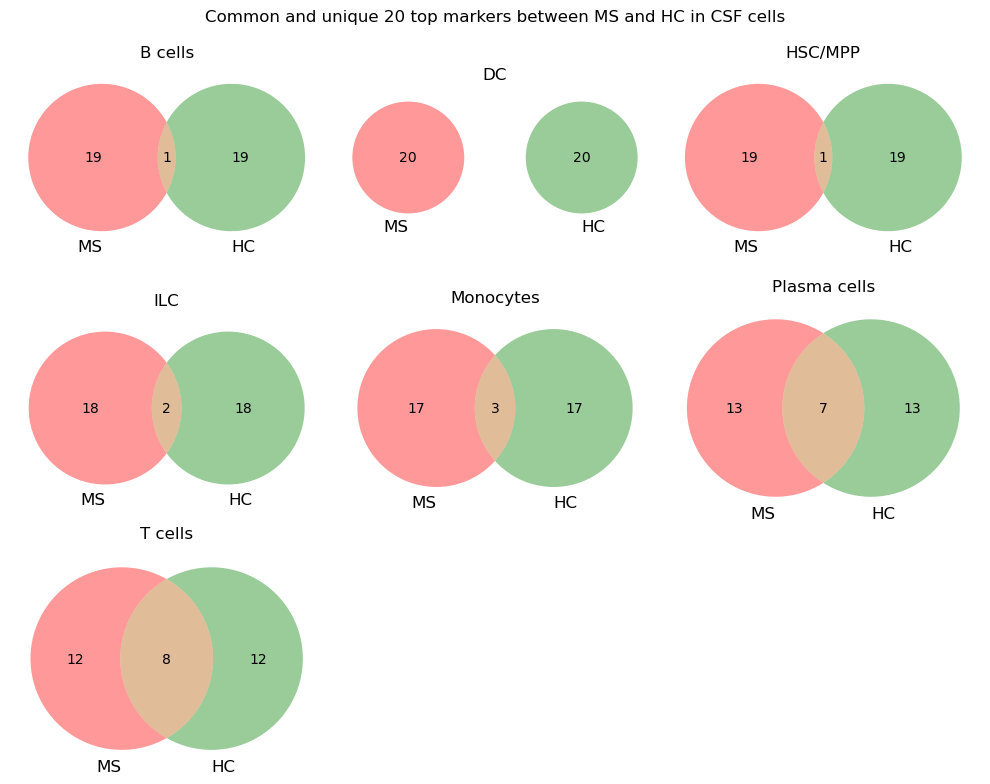

In [6]:
common_markers = {}
unique_markers_MS = {}
unique_markers_HC = {}

for cell_type in markers_csf_ms:
    common_markers[cell_type] = set(markers_csf_ms[cell_type]).intersection(markers_csf_hc[cell_type])
    unique_markers_MS[cell_type] = set(markers_csf_ms[cell_type]) - common_markers[cell_type]
    unique_markers_HC[cell_type] = set(markers_csf_hc[cell_type]) - common_markers[cell_type]

# Crea il diagramma di Venn
plt.figure(figsize=(10, 8))
for i, cell_type in enumerate(markers_csf_ms):
    ax = plt.subplot(3, 3, i+1)
    venn2(subsets=(len(unique_markers_MS[cell_type]), len(unique_markers_HC[cell_type]), len(common_markers[cell_type])),
        set_labels=('MS', 'HC'), ax=ax)
    ax.set_title(cell_type)

plt.suptitle('Common and unique 20 top markers between MS and HC in CSF cells')
plt.tight_layout()
plt.show()

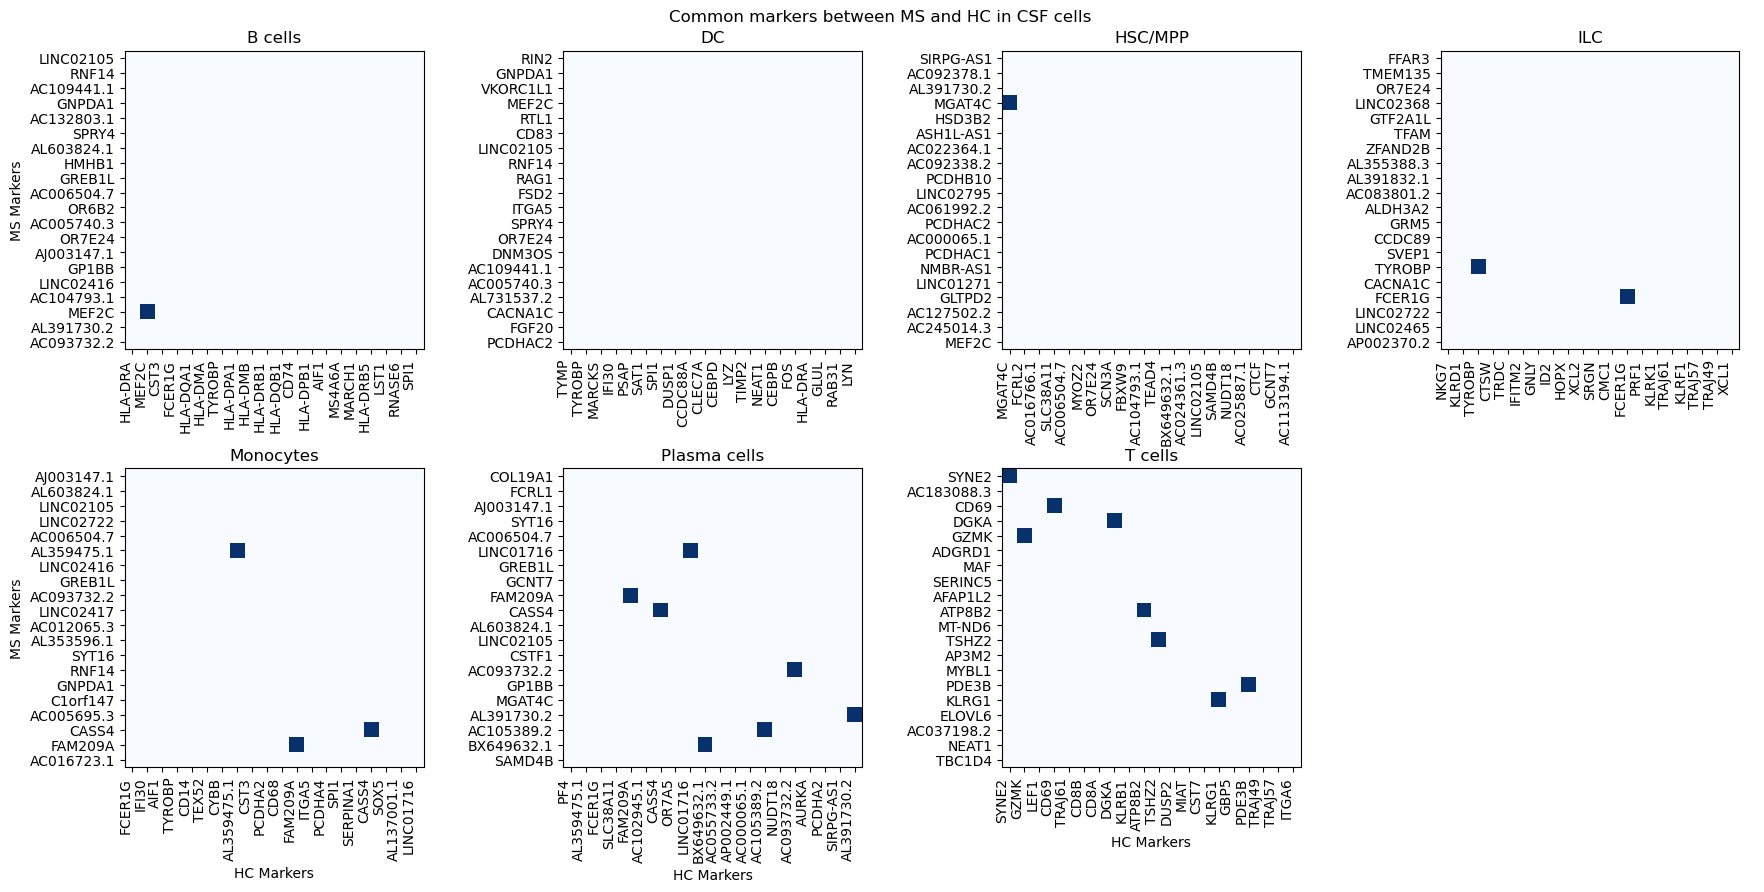

In [7]:
fig, axs = plt.subplots(2, 4, figsize=(18, 9))

for i, ax in enumerate(axs.flatten()):
    if i % 4 == 0: ax.set_ylabel('MS Markers')
    if i >= 4 and i < 7: ax.set_xlabel('HC Markers')

for cell_type, ax in zip(unique_markers_MS.keys(), axs.flatten()):
    markers_MS_cell = markers_csf_ms[cell_type]
    markers_HC_cell = markers_csf_hc[cell_type]

    matrix = np.zeros((len(markers_MS_cell), len(markers_HC_cell)))

    for i, marker_MS in enumerate(markers_MS_cell):
        for j, marker_HC in enumerate(markers_HC_cell):
            if marker_MS == marker_HC:
                matrix[i, j] = 1
    
    ax.imshow(matrix, cmap='Blues', interpolation='nearest')

    # xticks only in first ax of each row of the sub plot

    ax.set_xticks(np.arange(len(markers_HC_cell)), markers_HC_cell, rotation=90, ha='right')
    ax.set_yticks(np.arange(len(markers_MS_cell)), markers_MS_cell)
    ax.set_title(f'{cell_type}')

plt.suptitle('Common markers between MS and HC in CSF cells')
plt.tight_layout()
axs[1, 3].axis('off')
plt.show()

In [8]:
csf_df = pd.DataFrame(common_markers.items(), columns=['Cell Type', 'Common Markers'])
csf_unique_MS_df = pd.DataFrame(unique_markers_MS.items(), columns=['Cell Type', 'MS Unique Markers'])
csf_unique_HC_df = pd.DataFrame(unique_markers_HC.items(), columns=['Cell Type', 'HC Unique Markers'])

In [9]:
csf_df

,Cell Type,Common Markers
0,B cells,{MEF2C}
1,DC,{}
2,HSC/MPP,{MGAT4C}
3,ILC,"{FCER1G, TYROBP}"
4,Monocytes,"{AL359475.1, FAM209A, CASS4}"
5,Plasma cells,"{CASS4, BX649632.1, LINC01716, AC105389.2, FAM..."
6,T cells,"{CD69, GZMK, SYNE2, ATP8B2, TSHZ2, PDE3B, KLRG..."


In [10]:
csf_unique_MS_df

,Cell Type,MS Unique Markers
0,B cells,"{GNPDA1, HMHB1, GP1BB, AJ003147.1, OR6B2, AL60..."
1,DC,"{GNPDA1, CD83, MEF2C, CACNA1C, RAG1, ITGA5, VK..."
2,HSC/MPP,"{AC000065.1, AC245014.3, LINC02795, MEF2C, AC0..."
3,ILC,"{GTF2A1L, CCDC89, TFAM, AP002370.2, SVEP1, CAC..."
4,Monocytes,"{GNPDA1, AJ003147.1, AC012065.3, AL353596.1, L..."
5,Plasma cells,"{COL19A1, AC006504.7, GP1BB, LINC02105, AJ0031..."
6,T cells,"{AFAP1L2, MAF, MT-ND6, ELOVL6, NEAT1, SERINC5,..."


In [11]:
csf_unique_HC_df

,Cell Type,HC Unique Markers
0,B cells,"{HLA-DPB1, HLA-DRB5, HLA-DQB1, HLA-DRA, TYROBP..."
1,DC,"{PSAP, CEBPB, DUSP1, MARCKS, CCDC88A, HLA-DRA,..."
2,HSC/MPP,"{AC016766.1, SLC38A11, FBXW9, NUDT18, CTCF, BX..."
3,ILC,"{TRAJ57, TRAJ61, PRF1, CMC1, NKG7, TRAJ49, XCL..."
4,Monocytes,"{CD14, CD68, TYROBP, LINC01716, ITGA5, AL13700..."
5,Plasma cells,"{AC055733.2, SLC38A11, AC102945.1, AC000065.1,..."
6,T cells,"{TRAJ57, TRAJ61, GBP5, LEF1, CD8B, DUSP2, ITGA..."


In [12]:
# save results
csf_df.to_csv('results/common_markers_CSF.csv', index=False)
csf_unique_MS_df.to_csv('results/unique_markers_MS_CSF.csv', index=False)
csf_unique_HC_df.to_csv('results/unique_markers_HC_CSF.csv', index=False)

### PBMC

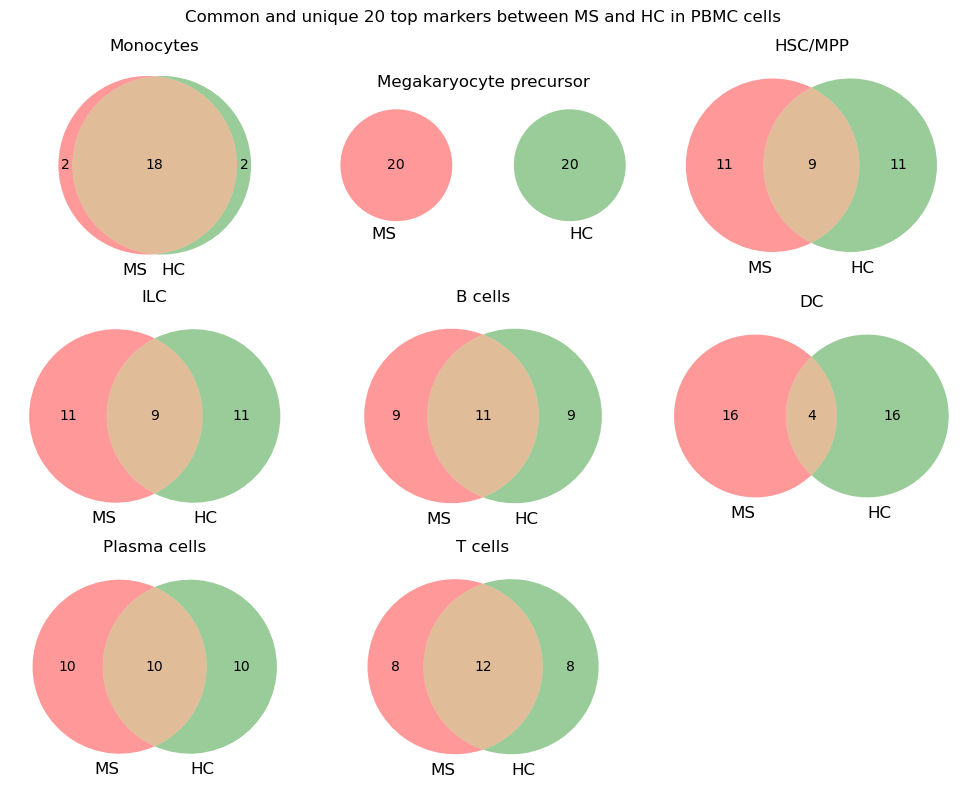

In [13]:
common_markers = {}
unique_markers_MS = {}
unique_markers_HC = {}

common_markers_list = list(set(markers_pbmc_ms.keys()).intersection(markers_pbmc_hc.keys()))

for cell_type in common_markers_list:
    common_markers[cell_type] = set(markers_pbmc_ms[cell_type]).intersection(markers_pbmc_hc[cell_type])
    unique_markers_MS[cell_type] = set(markers_pbmc_ms[cell_type]) - common_markers[cell_type]
    unique_markers_HC[cell_type] = set(markers_pbmc_hc[cell_type]) - common_markers[cell_type]

plt.figure(figsize=(10, 8))
for i, cell_type in enumerate(common_markers_list):
    ax = plt.subplot(3, 3, i+1)
    venn2(subsets=(len(unique_markers_MS[cell_type]), len(unique_markers_HC[cell_type]), len(common_markers[cell_type])),
        set_labels=('MS', 'HC'), ax=ax)
    ax.set_title(cell_type)

plt.suptitle('Common and unique 20 top markers between MS and HC in PBMC cells')
plt.tight_layout()
plt.show()

In [14]:
common_cell_type_pbmc = set(markers_pbmc_ms.keys()).intersection(markers_pbmc_hc.keys())

In [15]:
common_cell_type_pbmc

{'B cells',
 'DC',
 'HSC/MPP',
 'ILC',
 'Megakaryocyte precursor',
 'Monocytes',
 'Plasma cells',
 'T cells'}

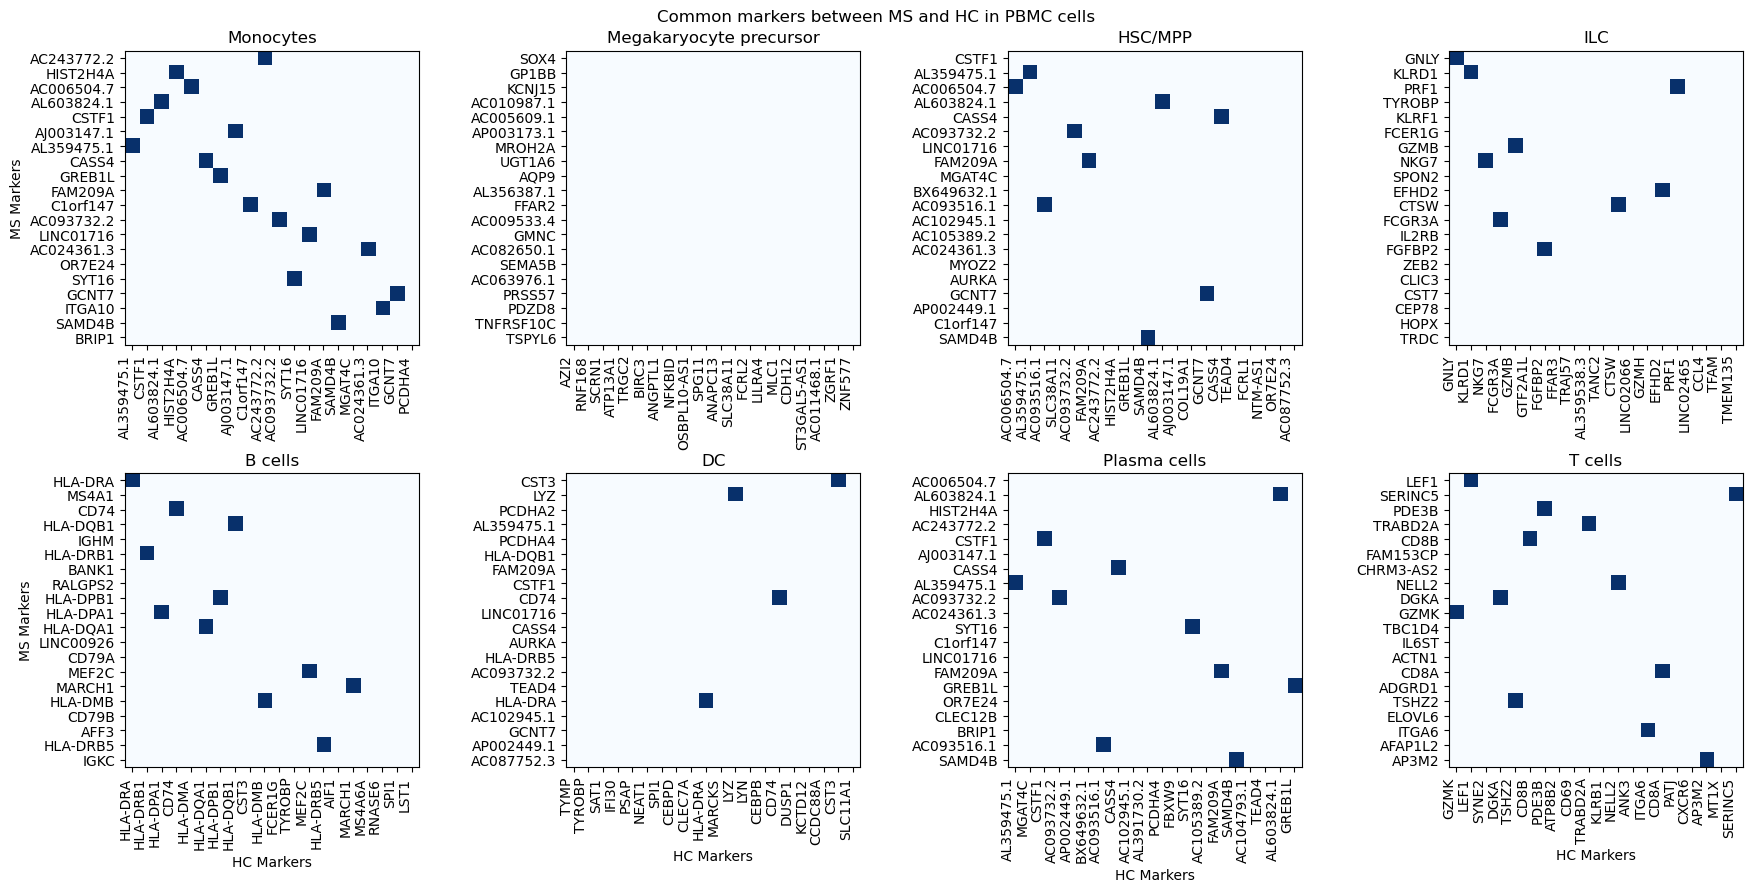

In [16]:
fig, axs = plt.subplots(2, 4, figsize=(18, 9))

for i, ax in enumerate(axs.flatten()):
    if i % 4 == 0: ax.set_ylabel('MS Markers')
    if i >= 4: ax.set_xlabel('HC Markers')

for cell_type, ax in zip(unique_markers_MS.keys(), axs.flatten()):
    if cell_type in common_cell_type_pbmc:
        markers_MS_cell = markers_pbmc_ms[cell_type]
        markers_HC_cell = markers_pbmc_hc[cell_type]

        matrix = np.zeros((len(markers_MS_cell), len(markers_HC_cell)))

        for i, marker_MS in enumerate(markers_MS_cell):
            for j, marker_HC in enumerate(markers_HC_cell):
                if marker_MS == marker_HC:
                    matrix[i, j] = 1
        
        ax.imshow(matrix, cmap='Blues', interpolation='nearest')

        # xticks only in first ax of each row of the sub plot

        ax.set_xticks(np.arange(len(markers_HC_cell)), markers_HC_cell, rotation=90, ha='right')
        ax.set_yticks(np.arange(len(markers_MS_cell)), markers_MS_cell)
        ax.set_title(f'{cell_type}')

plt.suptitle('Common markers between MS and HC in PBMC cells')
plt.tight_layout()
plt.show()

In [17]:
pbmc_df = pd.DataFrame(common_markers.items(), columns=['Cell Type', 'Common Markers'])
pbmc_unique_MS_df = pd.DataFrame(unique_markers_MS.items(), columns=['Cell Type', 'MS Unique Markers'])
pbmc_unique_HC_df = pd.DataFrame(unique_markers_HC.items(), columns=['Cell Type', 'HC Unique Markers'])

In [18]:
pbmc_df

,Cell Type,Common Markers
0,Monocytes,"{AC024361.3, HIST2H4A, AC006504.7, AJ003147.1,..."
1,Megakaryocyte precursor,{}
2,HSC/MPP,"{AC006504.7, CASS4, SAMD4B, GCNT7, AL359475.1,..."
3,ILC,"{FCGR3A, EFHD2, PRF1, KLRD1, CTSW, NKG7, FGFBP..."
4,B cells,"{HLA-DQA1, HLA-DPA1, HLA-DPB1, HLA-DMB, HLA-DR..."
5,DC,"{LYZ, HLA-DRA, CST3, CD74}"
6,Plasma cells,"{CASS4, SYT16, SAMD4B, AL359475.1, CSTF1, AL60..."
7,T cells,"{GZMK, NELL2, LEF1, SERINC5, CD8B, ITGA6, TSHZ..."


In [19]:
pbmc_unique_HC_df

,Cell Type,HC Unique Markers
0,Monocytes,"{MGAT4C, PCDHA4}"
1,Megakaryocyte precursor,"{SLC38A11, CDH12, ATP13A1, SCRN1, RNF168, OSBP..."
2,HSC/MPP,"{SLC38A11, COL19A1, HIST2H4A, AC087752.3, AJ00..."
3,ILC,"{GTF2A1L, GZMH, TANC2, TFAM, TRAJ57, LINC02066..."
4,B cells,"{MS4A6A, LST1, CST3, TYROBP, HLA-DMA, FCER1G, ..."
5,DC,"{PSAP, CEBPB, MARCKS, CCDC88A, DUSP1, TYROBP, ..."
6,Plasma cells,"{AC102945.1, FBXW9, AC104793.1, BX649632.1, AP..."
7,T cells,"{CD69, SYNE2, MT1X, ATP8B2, PATJ, ANK3, KLRB1,..."


In [20]:
pbmc_unique_MS_df

,Cell Type,MS Unique Markers
0,Monocytes,"{BRIP1, OR7E24}"
1,Megakaryocyte precursor,"{AQP9, GP1BB, AC010987.1, SOX4, MROH2A, PRSS57..."
2,HSC/MPP,"{AC102945.1, AC024361.3, MYOZ2, BX649632.1, LI..."
3,ILC,"{KLRF1, SPON2, TYROBP, FCER1G, IL2RB, CLIC3, Z..."
4,B cells,"{IGKC, IGHM, MS4A1, AFF3, CD79B, RALGPS2, BANK..."
5,DC,"{PCDHA4, HLA-DQB1, CASS4, LINC01716, GCNT7, TE..."
6,Plasma cells,"{CLEC12B, AC024361.3, HIST2H4A, AC006504.7, AJ..."
7,T cells,"{AFAP1L2, ACTN1, ELOVL6, TBC1D4, FAM153CP, CHR..."


In [21]:
# save the results
pbmc_df.to_csv('results/common_markers_pbmc.csv', index=False)
pbmc_unique_MS_df.to_csv('results/unique_markers_MS_pbmc.csv', index=False)
pbmc_unique_HC_df.to_csv('results/unique_markers_HC_pbmc.csv', index=False)